**Introduction**

This dataset has pulled from four different sources United Nations Development Program, World Bank, Kaggle and World Health Organization. Since this data set doesn't have enough information for 2016, we'll exclude it from the dataset. Also, this dataset didn't include China and India. Two of the biggest countries in Asia by population.

Loading libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing file from the local storage

In [2]:
global_suicide = pd.read_csv('C:/Users/somnath/OneDrive/Documents/Data Analysis/csv file/Global_suicide_rate.csv')

**Cleaning:**

Since we don't have enough data in 2016, so we will exclude year '2016' from the dataset and changing data value '5-14 years' to '05-14 years' in age column.

In [3]:
global_suicide = global_suicide[global_suicide.year!= 2016]
global_suicide['age'] = global_suicide['age'].str.replace('5-14 years','05-14 years')

Rename the columns names

In [4]:
global_suicide.rename(columns={'suicides/100k pop':'suicides_pop','country-year':'country_year','HDI for year':'HDI_for_year',
                  ' gdp_for_year ($) ':'gdp_for_year',' gdp_per_capita ($) ':'gdp_per_capita',
                  'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)

In [5]:
global_suicide.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
global_suicide.describe()

,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_per_capita
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
global_suicide.shape

(27660, 12)

In [8]:
global_suicide.info

<bound method DataFrame.info of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male  05-14 years           60     2762158   
27818  Uzbekistan  2014  female  05-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides_pop    country_year  HDI_for_year    gdp_for_year  \
0              6.71   

In [9]:
global_suicide.tail()

,country,year,sex,age,suicides_no,population,suicides_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


Set default plot, color and font size.

In [10]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 14

Distribution of number of countries.

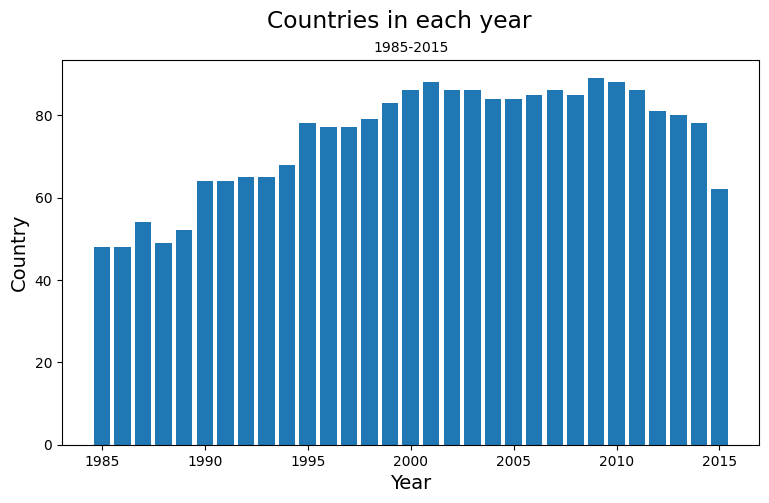

In [11]:


country_df = global_suicide.groupby(by='year', as_index=False).agg({'country': pd.Series.nunique})
country_df
plt.bar(country_df.year, country_df.country)
plt.suptitle('Countries in each year')
plt.title('1985-2015', fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Country');

This plot shows the distribution of the total number of countries each year between 1985 and 2015. The number of countries increases over the year. From 1995 to 2014, the number of countries hovered between 78 and 89.

Global trend over time in suicides per 100k population between 1985 and 2015. Suicides peaked to 243,544 in 1995. However, it decreased over time.

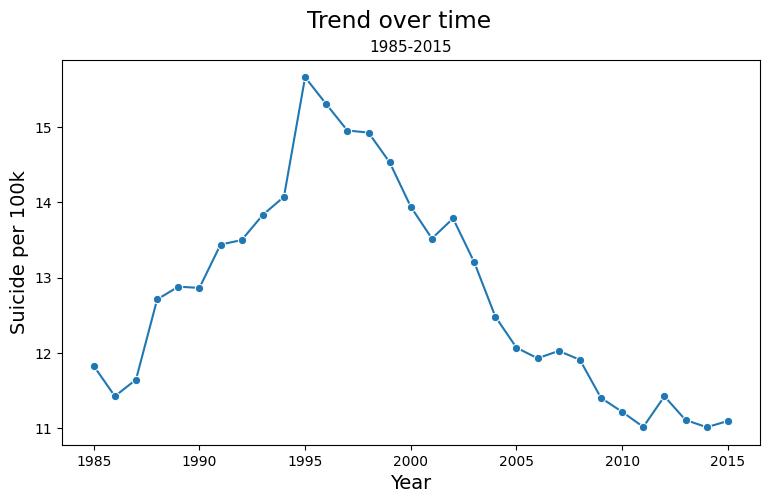

In [137]:
sns.lineplot(x = global_suicide.year, y = global_suicide.suicides_pop, errorbar = None, marker = 'o')
plt.suptitle('Trend over time')
plt.title('1985-2015', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Suicide per 100k');

We can see that between 1985 and 1995, the global suicide rate increased; the global suicide rate has decreased dramatically since 1995. The suicide rate is lower than it was in 1985.

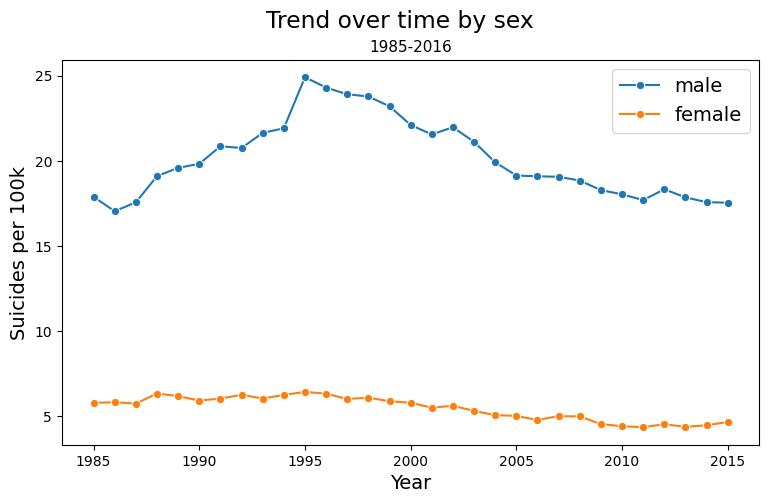

In [138]:
male_df = global_suicide[global_suicide.sex == 'male']
female_df = global_suicide[global_suicide.sex == 'female']
sns.lineplot(x = male_df.year, y = male_df.suicides_pop, markers= True, errorbar = None, marker = 'o')
sns.lineplot(x = female_df.year, y = female_df.suicides_pop, markers= True, errorbar = None, marker = 'o');
plt.suptitle('Trend over time by sex')
plt.title('1985-2016', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.legend(['male', 'female']);

As we can see, male suicides were peaked in 1995, but it decreased over time.

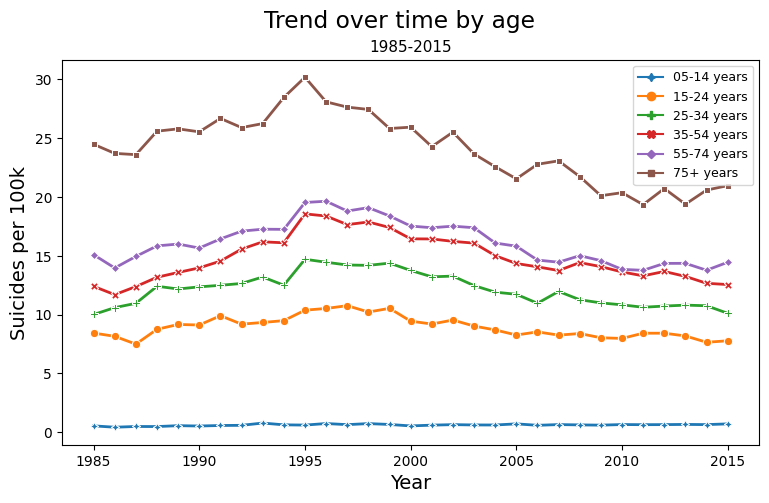

In [14]:
sns.lineplot(x = global_suicide.year,y = global_suicide.suicides_pop,
             hue = global_suicide.age, hue_order  = ['05-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'],
             style = global_suicide.age, linewidth = 2, markers = True, 
             errorbar = None, dashes = False)
plt.suptitle('Trend over time by age')
plt.title('1985-2015', fontsize = 11)
plt.legend(loc = 1, fontsize = 9)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k');

Trend over time by age. All age group suicides per 100k drop over time except 5-14 years age group.

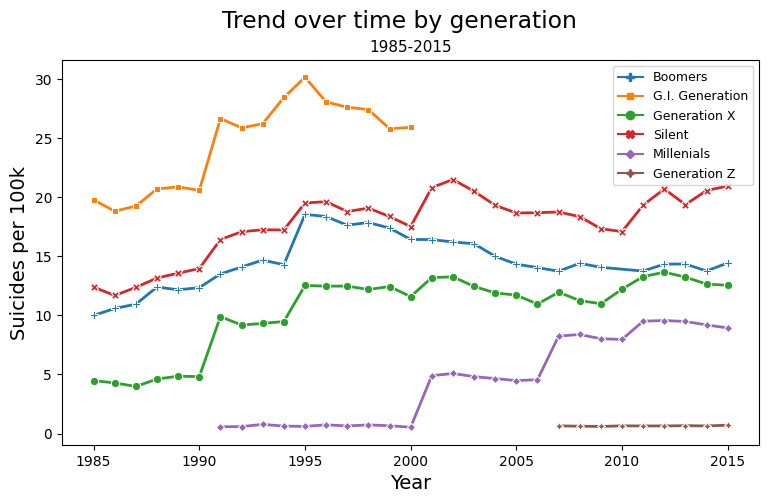

In [15]:
sns.lineplot(x = global_suicide.year, y = global_suicide.suicides_pop,
             hue = global_suicide.generation, hue_order= ['Boomers', 'G.I. Generation','Generation X', 'Silent', 'Millenials', 'Generation Z'],
             style = global_suicide.generation, linewidth = 2, markers = True,
             errorbar = None, dashes = False)
plt.suptitle('Trend over time by generation')
plt.title('1985-2015', fontsize = 11)
plt.legend(loc = 1, fontsize = 9)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k');

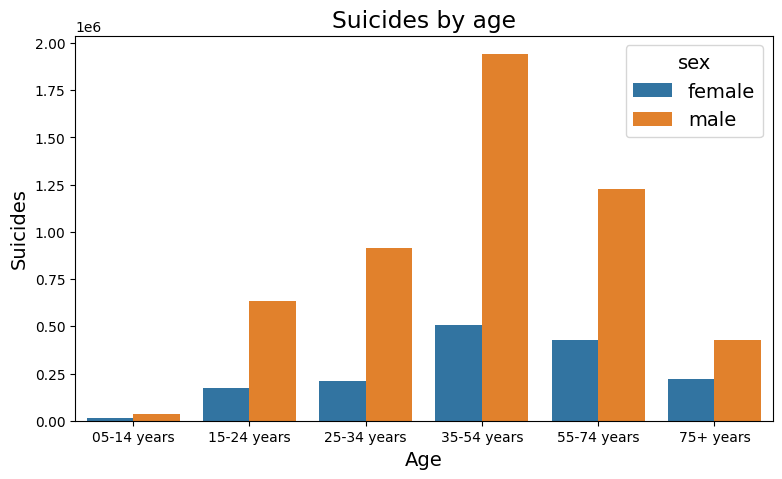

In [25]:
age_df = global_suicide.groupby(['age', 'sex'], as_index = False).agg('suicides_no').sum().sort_values('age')
sns.barplot(x = 'age', y = 'suicides_no', hue ='sex', data = age_df)
plt.title('Suicides by age')
plt.xlabel('Age')
plt.ylabel('Suicides');

We can see that overall suicide numbers increases as age increases. Age between 35-54 has a higher suicide rate, followed by 55-74 years. However, overall, suicides are lower for 75+ years.

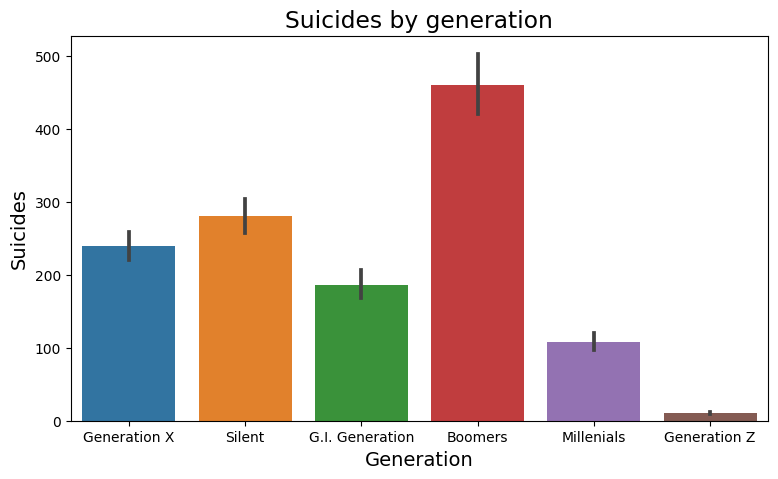

In [28]:
generation_df = global_suicide.groupby(by = 'generation', as_index = False).agg('suicides_no').sum()
sns.barplot( x = 'generation', y = 'suicides_no', data = global_suicide)
plt.title('Suicides by generation')
plt.xlabel('Generation')
plt.ylabel('Suicides');

Boomers have highest suicide rates on average than other generations; since they were born between 1946 and 1964.

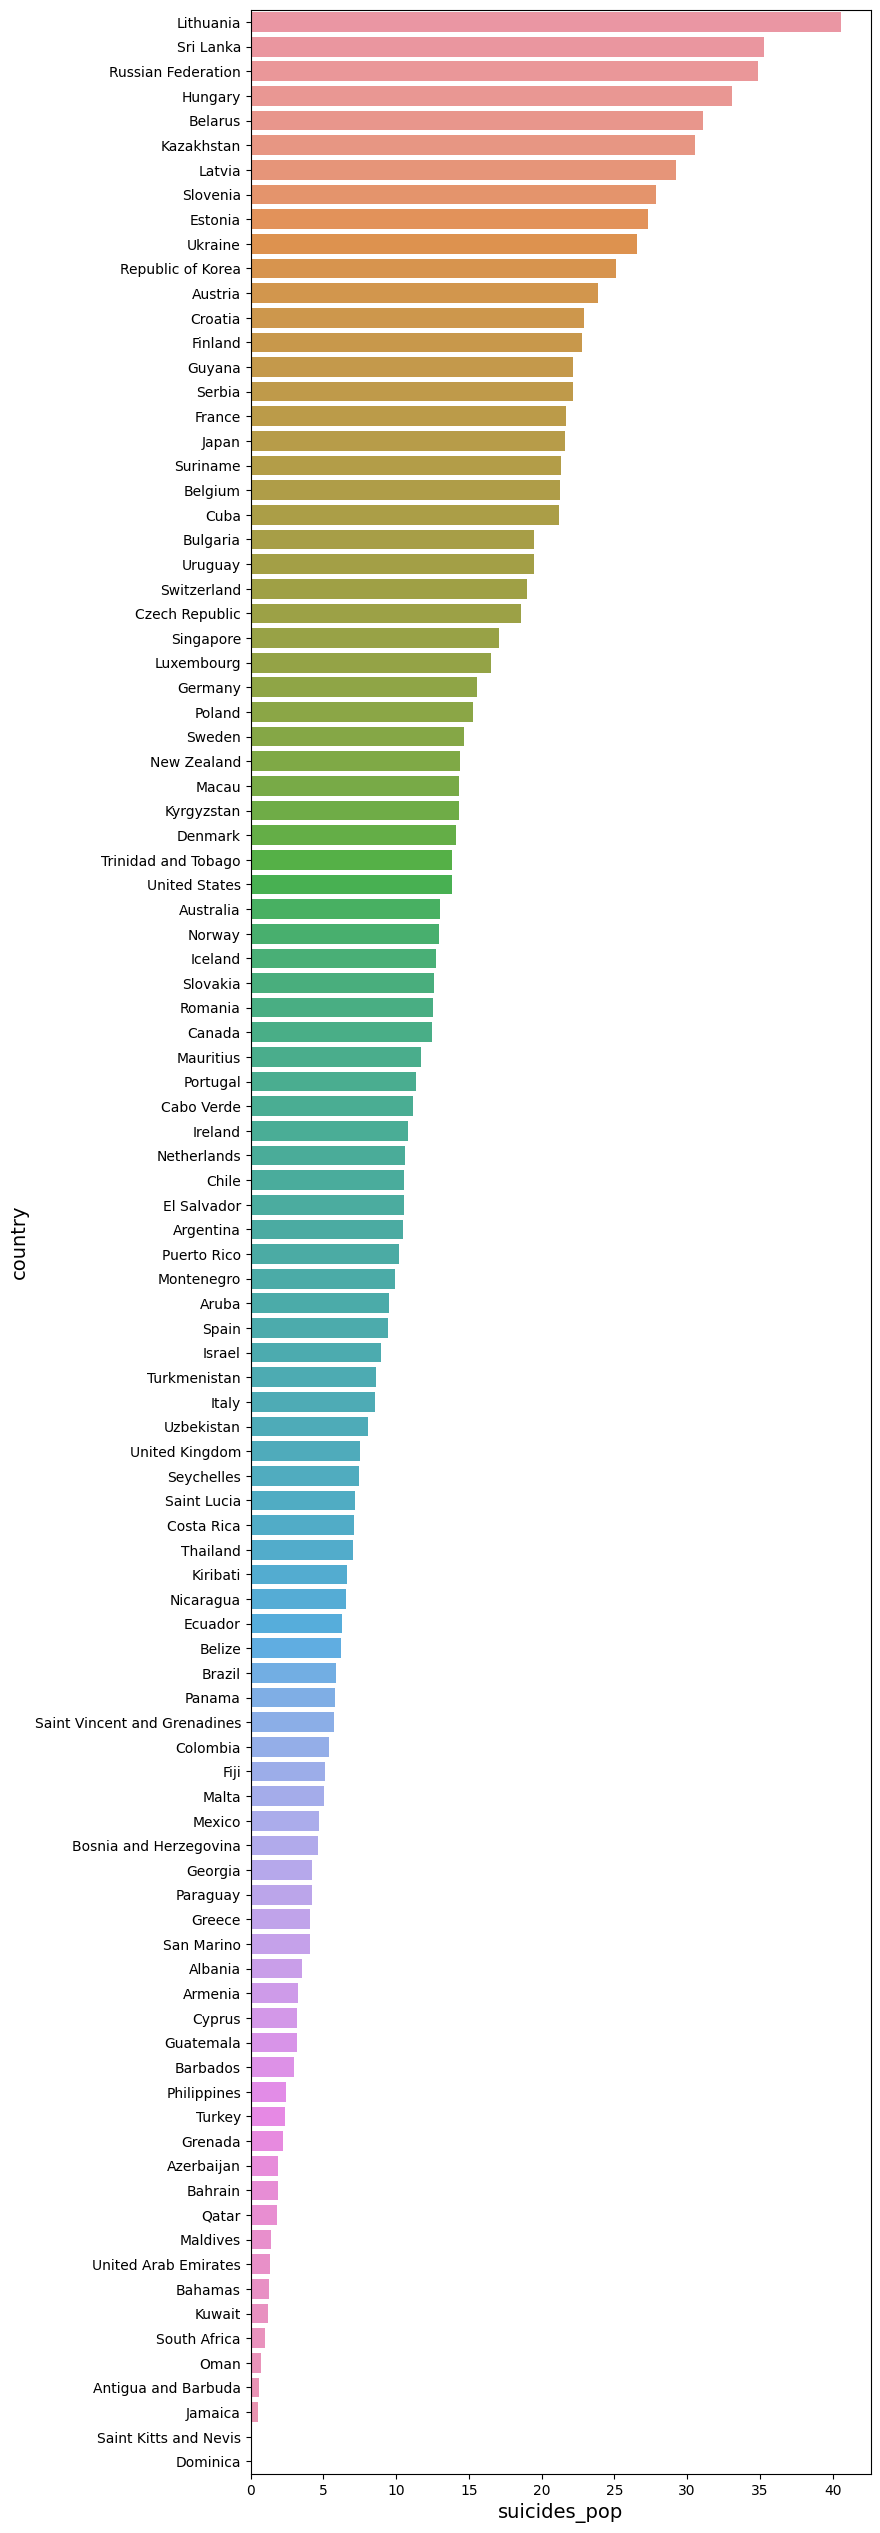

In [81]:
country_df = global_suicide.groupby('country', as_index = False).agg('suicides_pop').mean().sort_values('suicides_pop', ascending = False)
plt.figure(figsize= (8, 32))
sns.barplot(x = 'suicides_pop', y = 'country', data = country_df, order = country_df['country']);

This plot shows countries where suicides were more than 10 per 100k population. Lithuania has an average of 41 suicides per 100k population, followed by Russia and Sri Lanka.

We selected top ten countries by suicides per 100k population.

In [122]:
country_df.head(10)

,country,suicides_pop
52,Lithuania,40.583968
86,Sri Lanka,35.295152
74,Russian Federation,34.892377
40,Hungary,33.049100
11,Belarus,31.075913
47,Kazakhstan,30.511282
51,Latvia,29.259325
83,Slovenia,27.827857
30,Estonia,27.276905
94,Ukraine,26.582321


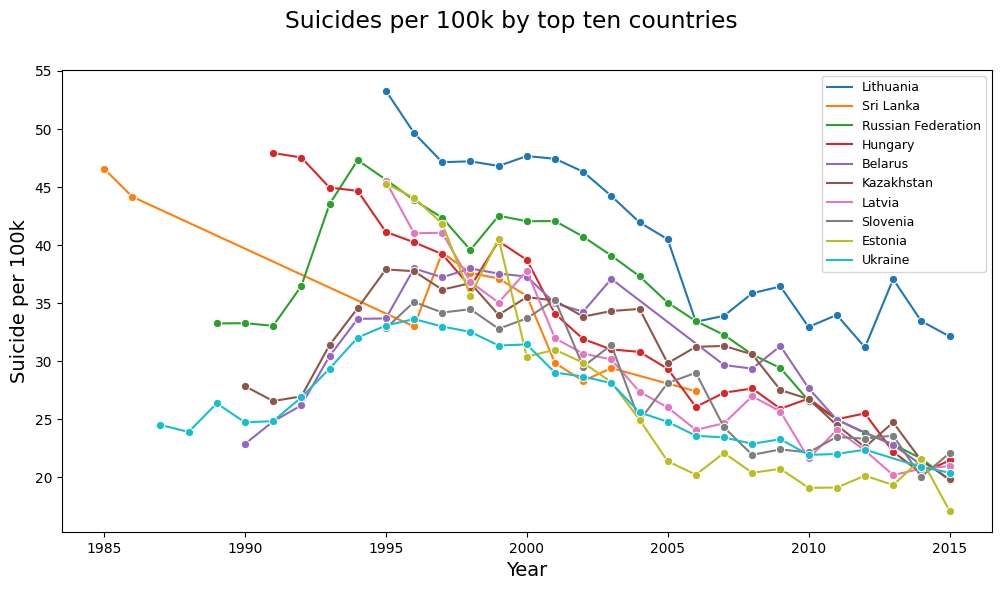

In [116]:
plt.figure(figsize = (12,6))
top_country_df = global_suicide.groupby(['year', 'country'], as_index = False).agg('suicides_pop').mean().sort_values('suicides_pop', ascending = False)
sns.lineplot(x = 'year', y = 'suicides_pop', data = top_country_df, hue = 'country', hue_order = ['Lithuania','Sri Lanka','Russian Federation',
                        'Hungary', 'Belarus','Kazakhstan', 'Latvia', 'Slovenia','Estonia', 'Ukraine'],
                         marker = 'o')
plt.legend(loc = 1, fontsize = 9)
plt.suptitle('Suicides per 100k by top ten countries')
plt.xlabel('Year')
plt.ylabel('Suicide per 100k');

The suicide rate decreases over time. However, it's still relatively higher compared to other countries.

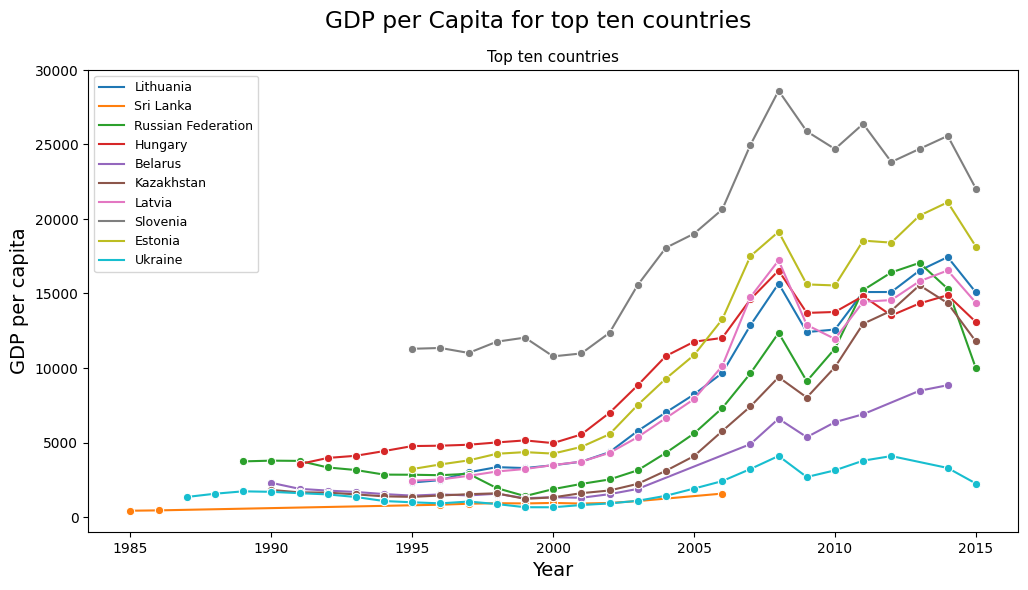

In [115]:
plt.figure(figsize = (12,6))
gdp_country_df = global_suicide.groupby(['year', 'country', 'gdp_per_capita'], as_index = False).agg('gdp_per_capita').mean()
sns.lineplot(x = 'year', y = 'gdp_per_capita', data = gdp_country_df, hue = 'country', hue_order = ['Lithuania','Sri Lanka','Russian Federation',
                        'Hungary', 'Belarus','Kazakhstan', 'Latvia', 'Slovenia','Estonia', 'Ukraine'],
                         marker = 'o')
plt.legend(loc = 0, fontsize = 9)
plt.suptitle('GDP per Capita for top ten countries')
plt.title('Top ten countries', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('GDP per capita');

We selected the top ten countries from the previous chart. We can see that GDP per capita increases over time.

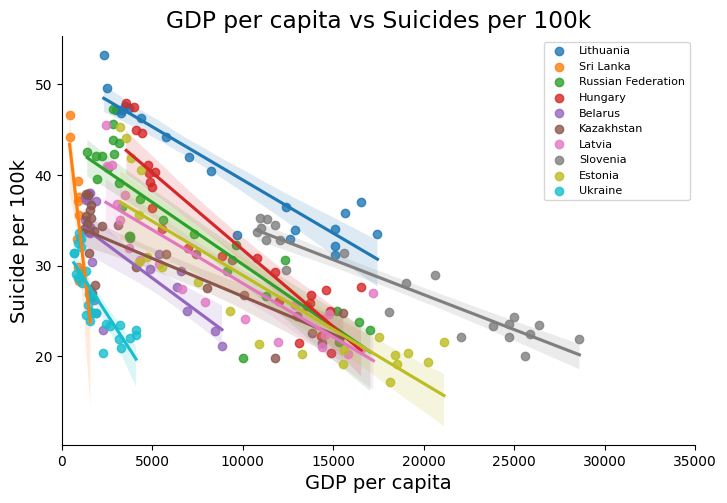

In [127]:
gdp_vs_suicide = global_suicide.groupby(['country', 'gdp_per_capita'], as_index = False).agg('suicides_pop').mean()
sns.lmplot(x = 'gdp_per_capita', y = 'suicides_pop', data = gdp_vs_suicide , hue = 'country', hue_order = ['Lithuania','Sri Lanka','Russian Federation',
                        'Hungary', 'Belarus','Kazakhstan', 'Latvia', 'Slovenia','Estonia', 'Ukraine'], legend = False, aspect = 1.5)
plt.xlim(0,35000)
plt.legend(fontsize = 8)
plt.title('GDP per capita vs Suicides per 100k')
plt.xlabel('GDP per capita')
plt.ylabel('Suicide per 100k');

We can see a negative linear correlation between GDP per capita and the Suicide rate. Suicide rate decreases as GDP per capita increases.

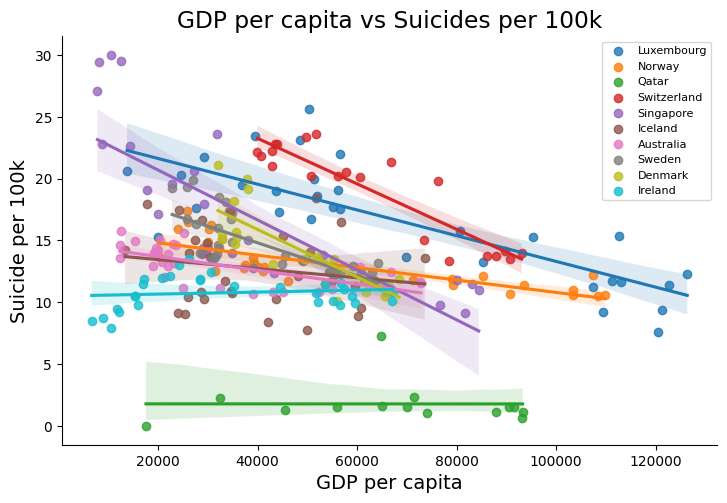

In [132]:
gdp_vs_suicide = global_suicide.groupby(['country', 'gdp_per_capita'], as_index = False).agg('suicides_pop').mean()
sns.lmplot(x = 'gdp_per_capita', y = 'suicides_pop', data = gdp_vs_suicide , hue = 'country', hue_order = ['Luxembourg', 'Norway', 'Qatar', 'Switzerland',
                        'Singapore', 'Iceland', 'Australia', 'Sweden', 'Denmark', 'Ireland'], legend = False, aspect = 1.5)
plt.legend(fontsize = 8)
plt.title('GDP per capita vs Suicides per 100k')
plt.xlabel('GDP per capita')
plt.ylabel('Suicide per 100k');

As we can see, the suicide rate decreases as GDP per capita increases. However, suicide rate has increased in Australia, despite increasing GDP per capita. There is a correlation between GDP and suicide rate. However, we can't say it's the only reason.

**Conclusion**

Suicide is a complex issue with multiple causes. We will never know the reasons behind suicide. But we can prevent it from happening. Mental illness, financial matters, identity, and social pressure, these factors may lead to suicide.

We live in a society where people don't feel safe. We should try to listen when someone wants to talk about it. In some countries, people don't talk about mental health issues.